<a href="https://colab.research.google.com/github/mashalkhyber/AI-LABS/blob/main/LabAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Mashal
Reg : sp23-bse-103

Github:
Youtube:https://youtu.be/dEnCMb3vOho?si=0nV61fPjIehvflyS

# 🧠 TASK #1: BFS and DFS on Trees and **Graphs**

In [ ]:
# BFS and DFS on a graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [], 'E': [], 'F': []
}

def bfs(graph, start):
    visited = []
    queue = [start]
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend(graph[node])
    return visited

def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

print("BFS:", bfs(graph, 'A'))
print("DFS:", dfs(graph, 'A'))


BFS: ['A', 'B', 'C', 'D', 'E', 'F']
DFS: ['A', 'B', 'D', 'E', 'C', 'F']


# TASK #2: Dictionary **Operations**

In [ ]:
student = {
    "name": "Mashal",
    "age": 21,
    "roll_number": "SP23-BSE-103",
    "grade": "B"
}

# 1. Print keys and values
print(student)

# 2. Update grade
student["grade"] = "A"

# 3. Add email
student["email"] = "mashal@example.com"

# 4. Delete roll_number
del student["roll_number"]

print(student)


{'name': 'Mashal', 'age': 21, 'roll_number': 'SP23-BSE-103', 'grade': 'B'}
{'name': 'Mashal', 'age': 21, 'grade': 'A', 'email': 'mashal@example.com'}


# 📊 TASK #3: Matplotlib Line **Plot**

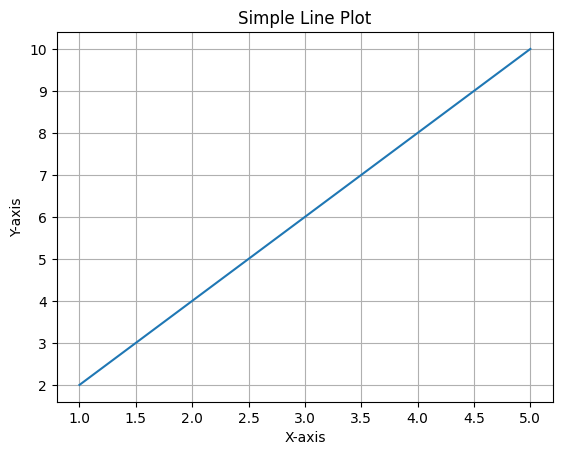

In [ ]:
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

plt.plot(X, Y)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


# 🧪 TASK #5: Water Jug Problem – BFS vs **DFS**

In [ ]:
from collections import deque

def is_goal(state):
    return state[0] == 2 or state[1] == 2

def get_next_states(state):
    x, y = state
    return [
        (4, y), (x, 3), (0, y), (x, 0),
        (min(x + y, 4), max(0, x + y - 4)),
        (max(0, x + y - 3), min(x + y, 3))
    ]

def bfs(start):
    visited = set()
    queue = deque([(start, [])])
    while queue:
        (state, path) = queue.popleft()
        if state in visited:
            continue
        visited.add(state)
        path = path + [state]
        if is_goal(state):
            return path
        for next_state in get_next_states(state):
            queue.append((next_state, path))
    return []

def dfs(start, visited=None, path=None):
    if visited is None: visited = set()
    if path is None: path = []
    visited.add(start)
    path = path + [start]
    if is_goal(start): return path
    for next_state in get_next_states(start):
        if next_state not in visited:
            result = dfs(next_state, visited, path)
            if result: return result
    return []

start = (0, 0)
print("BFS Path:", bfs(start))
print("DFS Path:", dfs(start))


BFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
DFS Path: [(0, 0), (4, 0), (4, 3), (0, 3), (3, 0), (3, 3), (4, 2)]


# 🧭 TASK #6: A* Search in **Maze**

In [ ]:
# 📌 Step 1: Define the Maze
maze = [
    [' ', ' ', ' ', 'X', 'Y'],
    ['X', 'X', ' ', 'X', 'X'],
    [' ', ' ', ' ', ' ', ' '],
    [' ', 'X', 'X', 'X', ' '],
    ['A', ' ', ' ', ' ', ' ']
]

# 📌 Step 2: Helper Functions
def find_position(maze, target):
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == target:
                return (i, j)
    return None

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

def get_neighbors(pos, maze):
    directions = [(-1,0), (1,0), (0,-1), (0,1)]
    neighbors = []
    for dx, dy in directions:
        x, y = pos[0] + dx, pos[1] + dy
        if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 'X':
            neighbors.append((x, y))
    return neighbors

# 📌 Step 3: A* Search Algorithm
def a_star(maze, start, goal):
    open_set = [(heuristic(start, goal), 0, start, [])]  # (f, g, position, path)
    visited = set()

    while open_set:
        open_set.sort()
        f, g, current, path = open_set.pop(0)

        if current in visited:
            continue
        visited.add(current)

        path = path + [current]

        if current == goal:
            return path

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                open_set.append((g + 1 + heuristic(neighbor, goal), g + 1, neighbor, path))

    return None

# 📌 Step 4: Run the Solver
start = find_position(maze, 'A')
goal = find_position(maze, 'Y')
path = a_star(maze, start, goal)

# 📌 Step 5: Display the Result
if path:
    print("✅ Path found:")
    for step in path:
        print(step)
    # Mark path on maze
    for x, y in path:
        if maze[x][y] == ' ':
            maze[x][y] = '.'
else:
    print("❌ No path found.")

# 📌 Step 6: Print Maze with Path
print("\n🧭 Maze with path:")
for row in maze:
    print(' '.join(row))


❌ No path found.

🧭 Maze with path:
      X Y
X X   X X
         
  X X X  
A        
